**Kevin Kyendy Mauwi**

# Prediciting customer churn

In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset
data = pd.read_csv('./archive/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
# dataset shape
data.shape

(7043, 21)

In [4]:
# dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are no missing values in the dataset

In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [7]:
# value counts for each column
value_counts_gender = data['gender'].value_counts()
value_counts_senior_citizen = data['SeniorCitizen'].value_counts()
value_counts_partner = data['Partner'].value_counts()
value_counts_dependents = data['Dependents'].value_counts()
value_counts_phone_service = data['PhoneService'].value_counts()
value_counts_multiple_lines = data['MultipleLines'].value_counts()
value_counts_internet_service = data['InternetService'].value_counts()
value_counts_online_security = data['OnlineSecurity'].value_counts()
value_counts_online_backup = data['OnlineBackup'].value_counts()
value_counts_device_protection = data['DeviceProtection'].value_counts()
value_counts_tech_support = data['TechSupport'].value_counts()
value_counts_streaming_tv = data['StreamingTV'].value_counts()
value_counts_streaming_movies = data['StreamingMovies'].value_counts()
value_counts_contract = data['Contract'].value_counts()
value_counts_paperless_billing = data['PaperlessBilling'].value_counts()
value_counts_payment_method = data['PaymentMethod'].value_counts()
value_counts_churn = data['Churn'].value_counts()

print('gender: \n', value_counts_gender,
     '\n senior citizen: \n', value_counts_senior_citizen,
     '\n partner: \n', value_counts_partner,
     '\n dependents: \n', value_counts_dependents,
     '\n phone services: \n', value_counts_phone_service,
     '\n multiple lines: \n', value_counts_multiple_lines,
     '\n internet service: \n', value_counts_internet_service,
     '\n online security: \n', value_counts_online_security,
     '\n online backup: \n', value_counts_online_backup,
     '\n device protection: \n', value_counts_device_protection,
     '\n tech support: \n', value_counts_tech_support,
     '\n streaming tv: \n', value_counts_streaming_tv,
     '\n streaming movies: \n', value_counts_streaming_movies,
     '\n contract: \n', value_counts_contract,
     '\n paperless billing: \n', value_counts_paperless_billing,
     '\n payment method: \n', value_counts_payment_method,
     '\n churn: \n', value_counts_churn)

gender: 
 Male      3555
Female    3488
Name: gender, dtype: int64 
 senior citizen: 
 0    5901
1    1142
Name: SeniorCitizen, dtype: int64 
 partner: 
 No     3641
Yes    3402
Name: Partner, dtype: int64 
 dependents: 
 No     4933
Yes    2110
Name: Dependents, dtype: int64 
 phone services: 
 Yes    6361
No      682
Name: PhoneService, dtype: int64 
 multiple lines: 
 No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 
 internet service: 
 Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 
 online security: 
 No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 
 online backup: 
 No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64 
 device protection: 
 No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProt

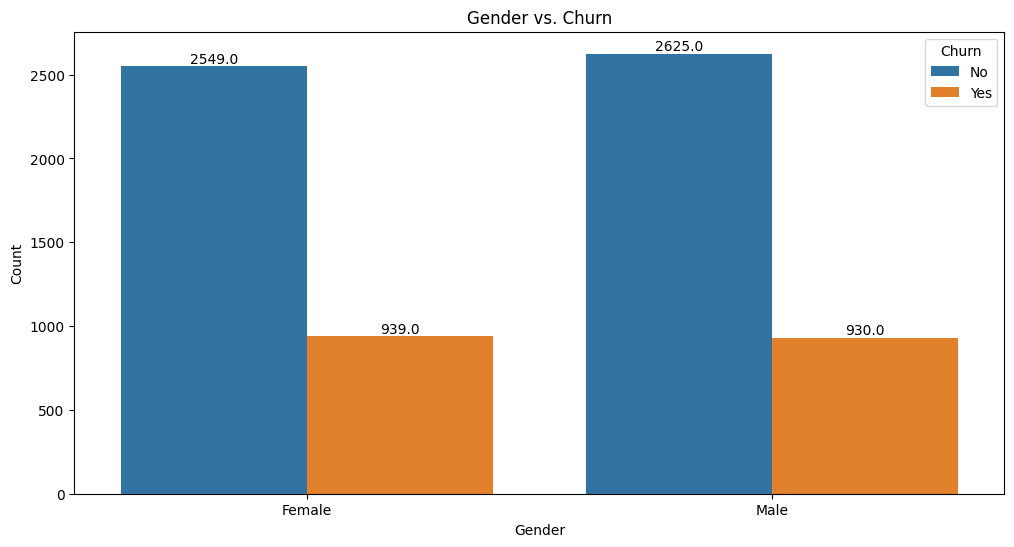

In [8]:
# count plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='gender', hue='Churn', data=data)

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender vs. Churn")

total = len(data)
for p in ax.patches:
    count = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, count, f'{count}', ha='center', va='bottom')

plt.legend(title="Churn", loc='upper right', labels=['No', 'Yes'])
plt.show()

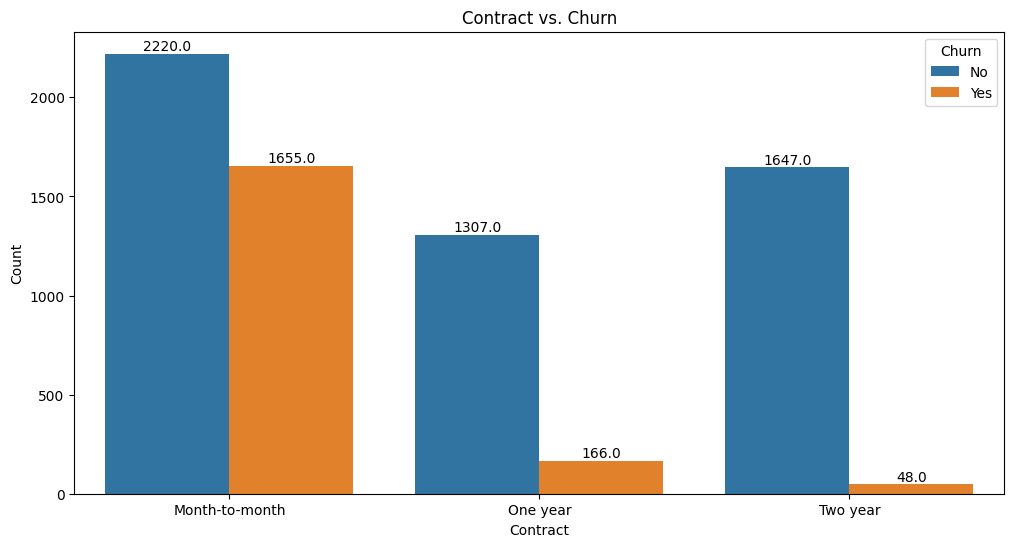

In [9]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Contract', hue='Churn', data=data)

plt.xlabel("Contract")
plt.ylabel("Count")
plt.title("Contract vs. Churn")

total = len(data)
for p in ax.patches:
    count = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, count, f'{count}', ha='center', va='bottom')

plt.legend(title="Churn", loc='upper right', labels=['No', 'Yes'])
plt.show()

In [10]:
# filter
churned = data[data['Churn'] == 'Yes']

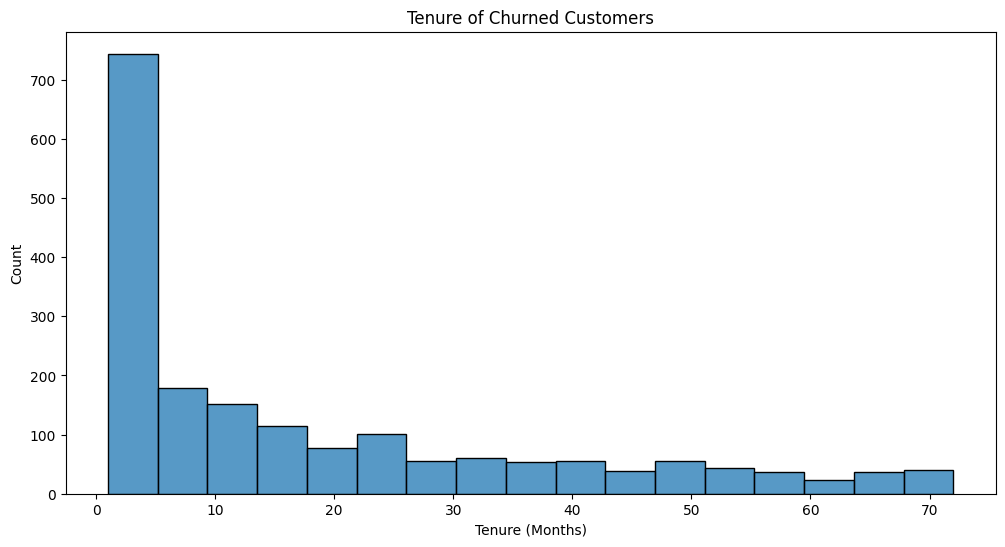

In [11]:
# histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=churned, x='tenure', bins='auto')

plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.title("Tenure of Churned Customers")

plt.show()

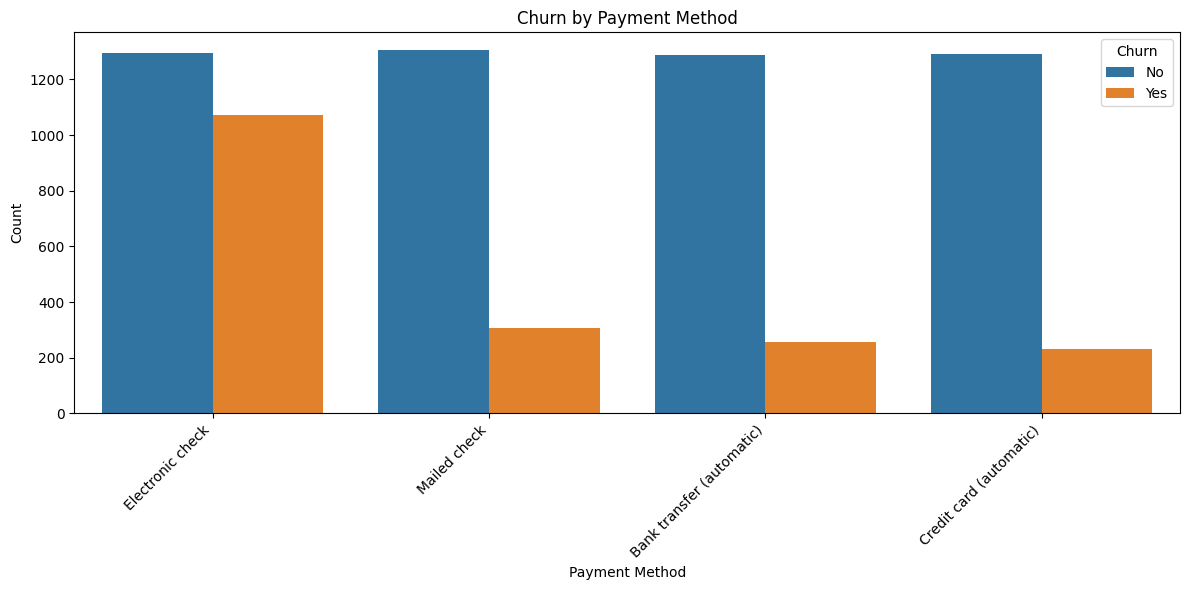

In [12]:
# bar plot
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='PaymentMethod', hue='Churn')

plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.title("Churn by Payment Method")

plt.legend(title="Churn", loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

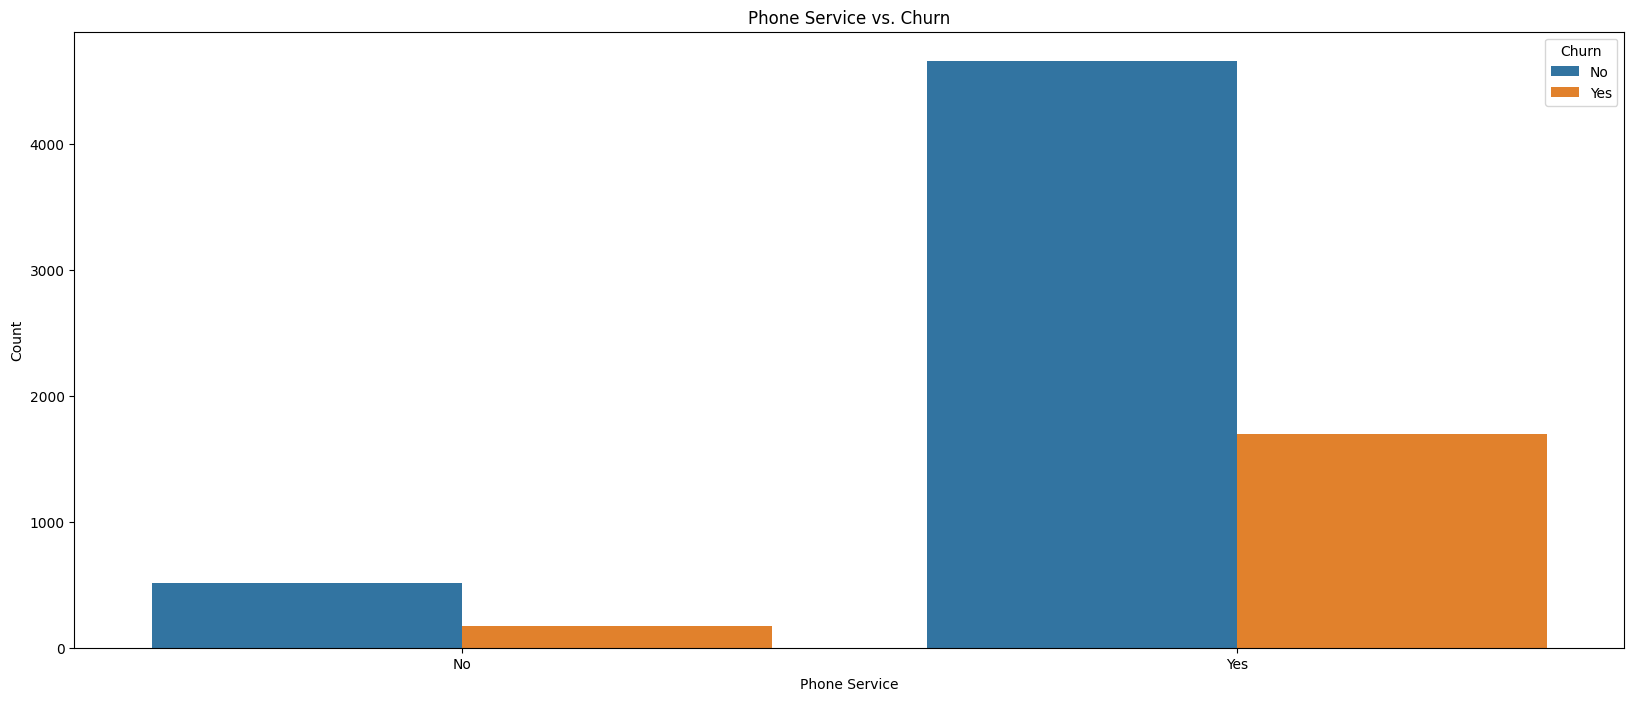

In [13]:
plt.figure(figsize=(20,8))  
sns.countplot(x='PhoneService', hue='Churn', data=data)

plt.xlabel("Phone Service")
plt.ylabel("Count")
plt.title("Phone Service vs. Churn")

plt.legend(title="Churn", loc='upper right', labels=['No', 'Yes'])
plt.show()

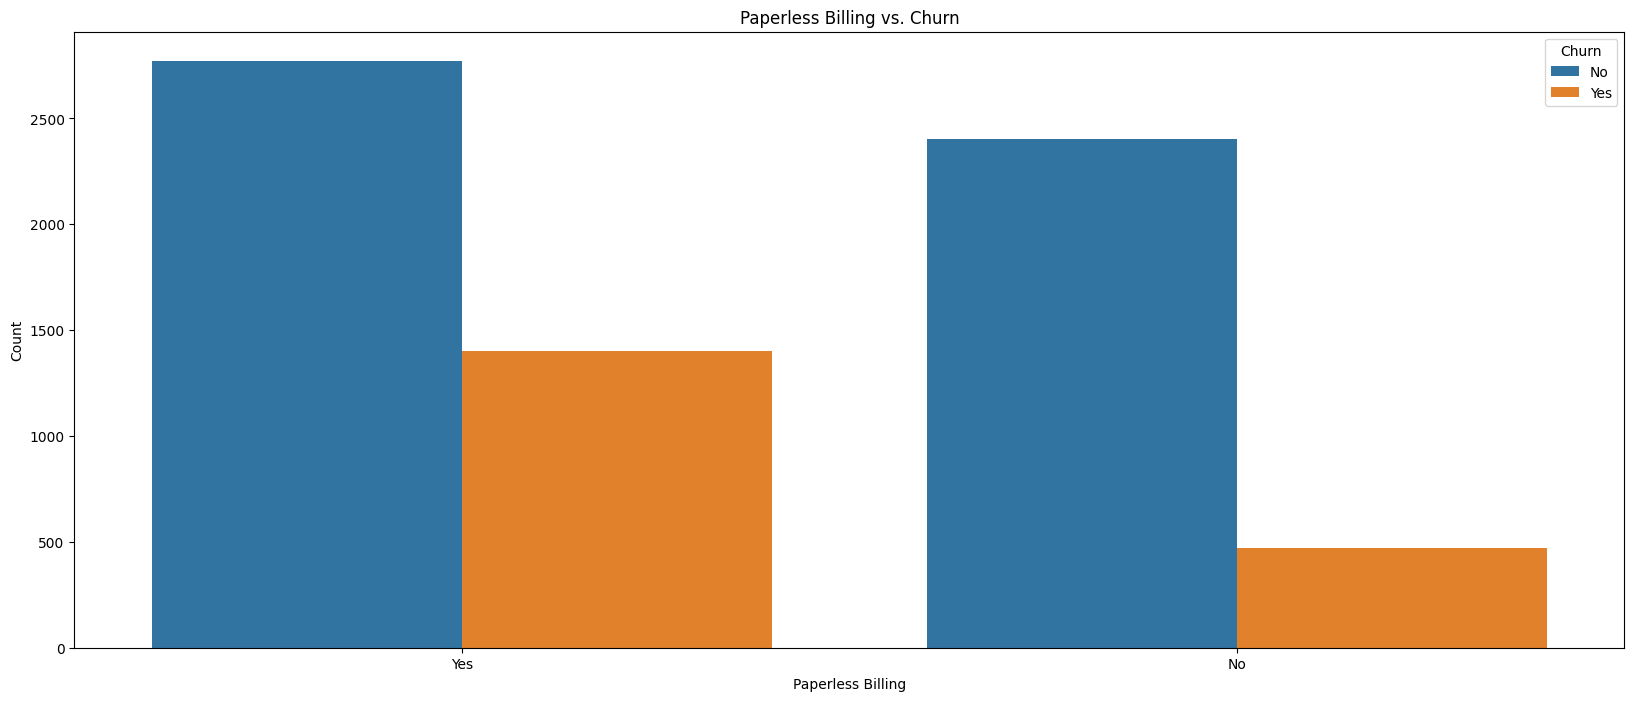

In [14]:
plt.figure(figsize=(20,8))  
sns.countplot(x='PaperlessBilling', hue='Churn', data=data)

plt.xlabel("Paperless Billing")
plt.ylabel("Count")
plt.title("Paperless Billing vs. Churn")

plt.legend(title="Churn", loc='upper right', labels=['No', 'Yes'])
plt.show()

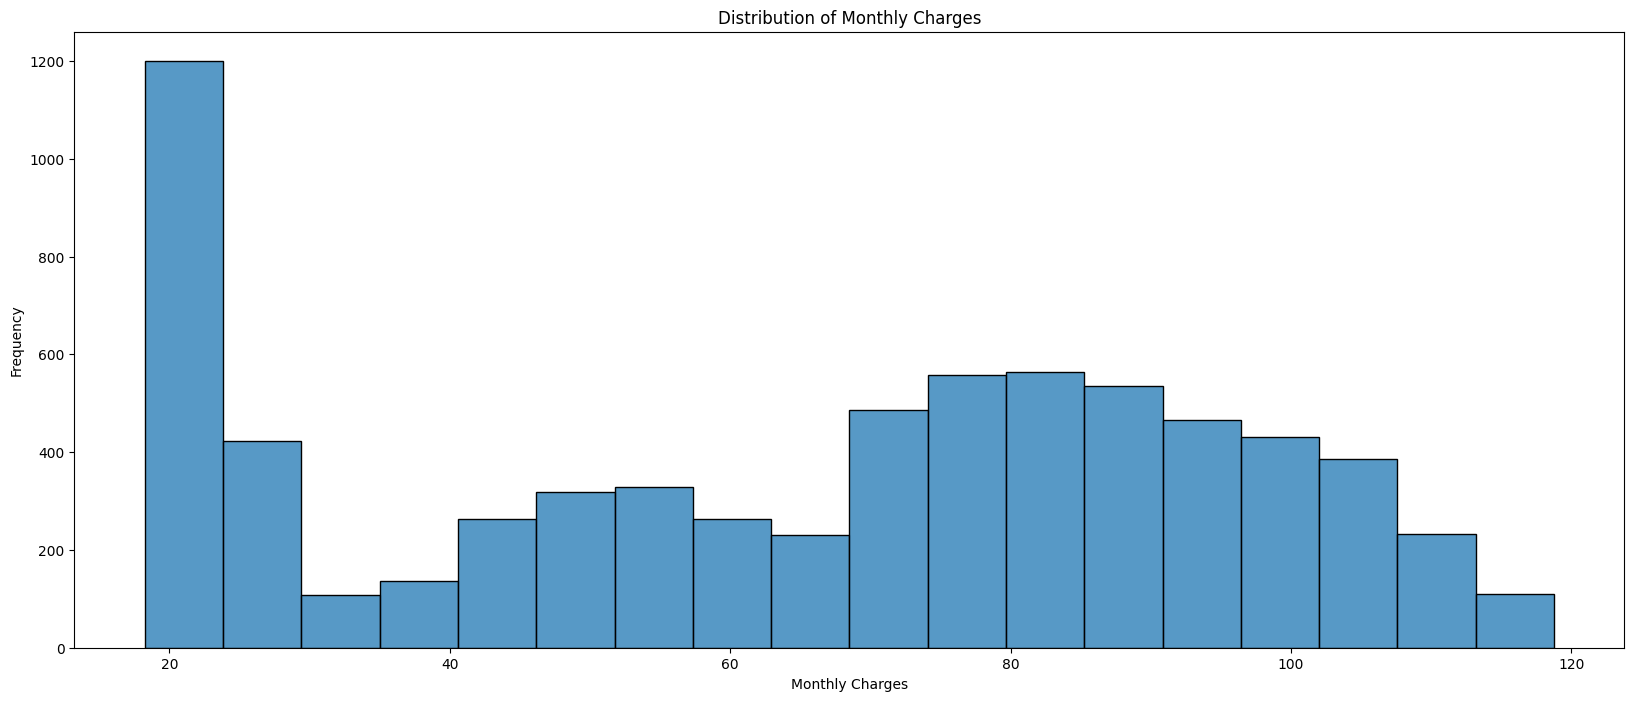

In [15]:
plt.figure(figsize=(20, 8))
sns.histplot(data['MonthlyCharges'], bins='auto')

plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.title("Distribution of Monthly Charges")

plt.show()

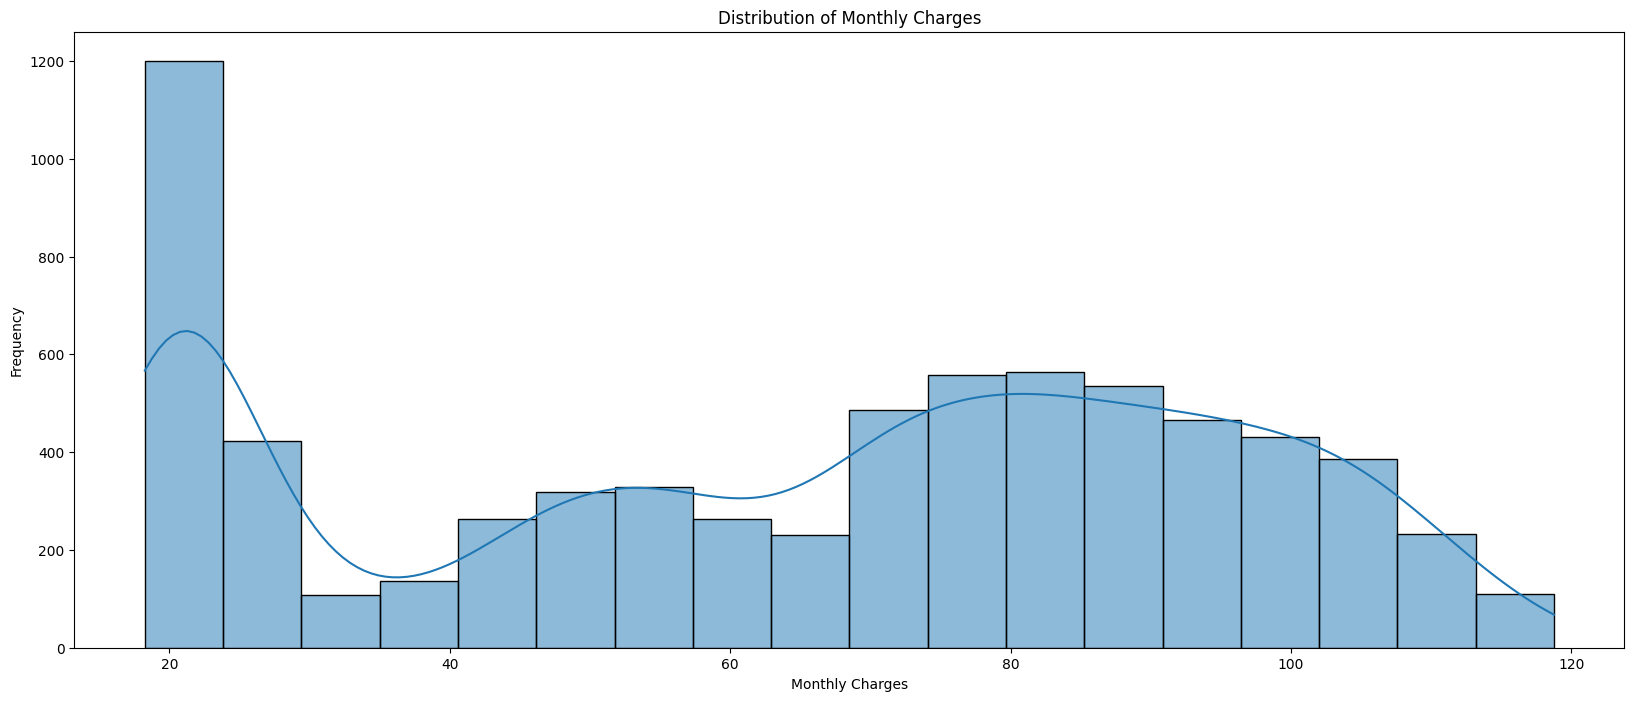

In [16]:
plt.figure(figsize=(20, 8))
sns.histplot(data['MonthlyCharges'], bins='auto', kde=True)

plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.title("Distribution of Monthly Charges")

plt.show()

In [17]:
# converting total charges to float
data['TotalCharges']=pd.to_numeric(data['TotalCharges'], errors='coerce')

# The errors='coerce' parameter is an option in pandas that can be used when converting data or performing operations that might result in errors.

In [18]:
missing_values_TotalCharges = data['TotalCharges'].isnull()

print(missing_values_TotalCharges)

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool


In [19]:
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Convert the target variable 'Churn' to numerical using LabelEncoder
label_encoder = LabelEncoder()
data['Churn'] = label_encoder.fit_transform(data['Churn'])

# Convert categorical variables to numeric using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Split the data into input features (X) and target variable (y)
X = data.drop(columns=['Churn'])
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

print(f'Logistic Regression Metrics:')
print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}')


C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Metrics:
Accuracy: 0.8102, Precision: 0.6769, Recall: 0.5767, F1-score: 0.6228, ROC-AUC: 0.8569


In [22]:
# Get feature coefficients for the logistic regression model
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': logreg.coef_[0]})
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coefficients)


                             Feature  Coefficient
7052     InternetService_Fiber optic     0.603399
7068            PaperlessBilling_Yes     0.424865
7065             StreamingMovies_Yes     0.333102
7050  MultipleLines_No phone service     0.303572
0                      SeniorCitizen     0.270472
...                              ...          ...
7066               Contract_One year    -0.393104
7061                 TechSupport_Yes    -0.488316
7049                PhoneService_Yes    -0.493070
7055              OnlineSecurity_Yes    -0.636200
7067               Contract_Two year    -0.869225

[7072 rows x 2 columns]


# Based on ChatGPT

Based on the feature coefficients from the logistic regression model, we can observe the following:

Positive Impact on Churn:
- Customers with Fiber optic InternetService are more likely to churn.
- Customers who have PaperlessBilling are more likely to churn.
- Customers who have StreamingMovies are more likely to churn.

Negative Impact on Churn:
- Customers with longer tenure are less likely to churn.
- Customers with TechSupport are less likely to churn.
- Customers with longer contract periods (One year or Two years) are less likely to churn.

Neutral Impact on Churn:
- The features 'MonthlyCharges' and 'TotalCharges' have minimal impact on churn.

Limitations of the Project:
- The dataset may not be representative of the entire population, as it is sourced from Kaggle and may have sampling bias.
- The feature set used for modeling may not include all relevant predictors that affect churn, which could impact the model's performance.

Possible Improvements or Future Work:
- Feature Engineering: Consider creating new features based on domain knowledge or feature interactions to improve model performance.
- Hyperparameter Tuning: Perform hyperparameter tuning using techniques like GridSearchCV or RandomizedSearchCV to optimize the model.
- Cross-Validation: Use cross-validation techniques to get a better estimate of model performance and reduce overfitting.
- Try Different Models: Explore other classification models like Random Forest, Gradient Boosting, or Support Vector Machines to compare their performance with logistic regression.
- Address Class Imbalance: If there is a significant class imbalance in the target variable (churn), consider using techniques like oversampling, undersampling, or SMOTE to balance the data.
- Collect More Data: Gathering more diverse and representative data could potentially improve the model's generalization ability.

Conclusion:
The logistic regression model provides valuable insights into the factors that influence churn in the telecommunications company's customer base. Features such as InternetService type, PaperlessBilling, StreamingMovies, and contract duration play significant roles in determining customer churn. It is important to leverage this information to develop targeted retention strategies for at-risk customers and optimize marketing efforts.

However, it is essential to recognize that this model may have limitations, and its performance can be further improved with more advanced techniques and feature engineering. Additionally, real-world deployment of the model would require continuous monitoring and updates as customer behaviors and preferences change over time.

Overall, this project serves as a foundation for churn prediction, and future work should focus on enhancing the model's accuracy and interpretability to provide actionable insights for the telecommunications company's business operations.